In [1]:
import numpy as np

In [2]:
# Tensor : container of data

In [3]:
# Scaler Tensor(Rank 0 tensor)
x = np.array(2)

In [4]:
x.ndim

0

In [5]:
# Rank 1 tensor : also called vectors
x = np.array([1,2,3,4,5]) # Its a 5 dimensional vector because it has 5 values, but its a 1 dimensional tensor

In [6]:
x.ndim

1

In [7]:
# Rank 2 tensor : also called matrix
x = np.array([
    [1,2,3,4,5],
    [5,4,6,7,3]
]
)

In [8]:
x.ndim

2

In [9]:
# Rank 3 tensor : stacking matrices together on top of each other 
# Usually coloured images have 3 matrices 'R,G and B' matrices stacked on top of each other
# When image is black and white, image is rank 3 tensor : (no. of images,rows,columns)
# When image is coloured, image is rank 4 tensor : (no. of images,rows,columns,channel) - channel has the values 'R' , 'G', 'B'

x = np.array([
[
    [1,2,3,4,5],
    [5,4,6,7,3]
],
[
    [4,6,8,9,0],
    [1,4,7,4,3]
]
]
)

In [10]:
x.ndim

3

In [11]:
x.dtype # To check the data type of the elements

dtype('int32')

In [12]:
import tensorflow as tf

In [13]:
# Initalize tensor of values 1
x = tf.ones(shape=(2,1))
x

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[1.],
       [1.]], dtype=float32)>

In [14]:
#Initalize tensor of values 0
x = tf.zeros(shape=(4,5))
x

<tf.Tensor: shape=(4, 5), dtype=float32, numpy=
array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32)>

In [15]:
# Tensor with random values drawn from normal distribution with mean = 0 and standard deviation =4.5
x = tf.random.normal(shape=(4,5) , mean = 0 , stddev=4.5)
x

<tf.Tensor: shape=(4, 5), dtype=float32, numpy=
array([[ 9.470139  ,  0.7052276 , -9.204323  ,  4.6271925 ,  0.7719117 ],
       [ 3.1718476 ,  3.0027509 , -1.5826395 , -0.6332247 ,  1.1739438 ],
       [ 2.8520641 ,  6.6764393 ,  0.22205095, -6.5008693 , -8.63143   ],
       [-0.36637655, -0.71065253, -0.11170719, -3.741755  , -2.5569236 ]],
      dtype=float32)>

In [16]:
#Gradient Tape : used to retrieve gradient of any differentiable expression wrt its inputs
# Used to retrieve gradient of the loss of a model wrt the weights of the model during backpropagation

input = tf.Variable(initial_value=3) # Assigning an initial values to input
with tf.GradientTape() as tape: # Calling the function gradientTape from tensorflow as tape 
    result = tf.square(input)

gradient = tape.gradient(result,input) # Calculating the gradient of the result wrt input

In [17]:
# If we are calling gradient tape to a constant value , need to do tape.watch on the input to manually watch it, so that it can be used later during
# gradient calculation (Not required in case of tensors)
# Usually all the traininable parameters are watched, becuase they are required to be used to calculate gradient of loss with them (during backprop)

input = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input) 
    result = tf.sqrt(input)
gradient = tape.gradient(result,input)

In [18]:
from tensorflow.keras.datasets import mnist

In [19]:
(X_train,y_train) , (X_test,y_test) = mnist.load_data()

In [20]:
X_train.shape # Images of 28X28 dimension , and there are 60000 images in train

(60000, 28, 28)

In [21]:
X_train.ndim # Rank 3 tensor(Image representation)

3

In [22]:
X_train.dtype 

dtype('uint8')

In [23]:
np.max(X_train) # Maximum pixel value

255

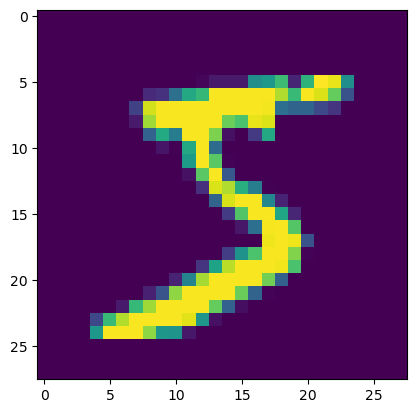

In [24]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0])

In [25]:
y_train[0]

5

In [26]:
slice = X_train[10:100 , : , :] # Selecting 90 images using slice selection

In [27]:
slice.shape

(90, 28, 28)

In [28]:
#mIf we want to slice the images as per different axis:
slice_1 = X_train[10:100, :25 , :20]

In [29]:
slice_1.shape

(90, 25, 20)

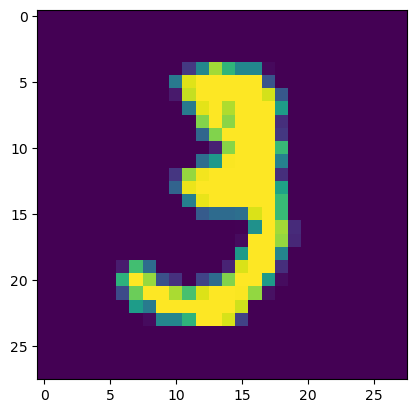

In [30]:
plt.imshow(slice[0])

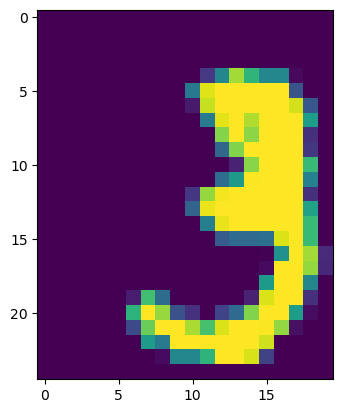

In [31]:
plt.imshow(slice_1[0])

In [32]:
# When comparing the above slices, we can see that the image is cropped because we are not selecting all the columns and rows in slice_1

In [33]:
slice_2 = X_train[10:100, 7:-7 , 7:-7] # Select the middle 14 X 14 part of the images

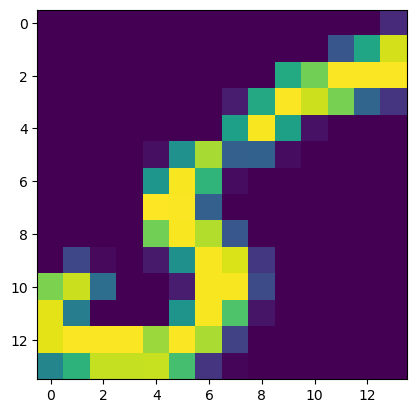

In [34]:
plt.imshow(slice_2[1])

In [35]:
batch_1 = X_train[:128] # Batch size of 128 selected from X_train 
batch_2 = X_train[128:256] # Next batch size of 128 selected from X_train
# The first axis of the tensor when getting the shape gives the number of images or batch size, so its also called the batch axis/dimension.